In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas
import matplotlib.pyplot as plt
from numpy import random
from shapely.geometry import Point
%matplotlib inline

In [2]:
# to import the raw data into pandas
#SARASFOEMS = pd.read_csv('SARA_SF_NO_SFO.csv', header=0)
SARASFOEMS = pd.read_csv('Sample.csv', header=0)
SARASFOEMS.head()

,Sample,IncidentNumber,Address,AlarmDt,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,City,Zipcode,Battalion,StationArea,NeighborhoodDistrict,Lat,Long
0,0.000009,17136034,852 Pacific Avenue,11/20/2017,1:40:24,11/20/2017,1:43:11,11/20/2017,1:51:17,San Francisco,94133,B01,2.0,Chinatown,37.796651,-122.409381
1,0.000031,16135275,14 Moneta Way,12/4/2016,15:09:28,12/4/2016,15:16:22,12/4/2016,15:19:41,San Francisco,94112,B09,33.0,Outer Mission,37.712845,-122.448957
2,0.000036,16117775,Illinois St/amador Street,10/22/2016,11:49:42,10/22/2016,11:50:46,10/22/2016,11:55:26,San Francisco,94124,B10,25.0,Bayview Hunters Point,37.745773,-122.386435
3,0.000054,17026987,399 Fremont Street,3/4/2017,9:45:23,3/4/2017,9:49:07,3/4/2017,10:06:39,San Francisco,94105,B03,35.0,Financial District/South Beach,37.786863,-122.392055
4,0.000059,17023161,301 Clay Street,2/23/2017,0:17:21,2/23/2017,0:20:22,2/23/2017,0:33:12,San Francisco,94111,B01,13.0,Financial District/South Beach,37.794644,-122.399644


In [3]:
SARASFOEMS['geometry'] = SARASFOEMS.apply(lambda row: Point(row['Long'], row['Lat']), axis=1)
SARASFOEMS.sample(5)

,Sample,IncidentNumber,Address,AlarmDt,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,City,Zipcode,Battalion,StationArea,NeighborhoodDistrict,Lat,Long,geometry
244,0.003626,16145615,140 South Van Ness Avenue,12/28/2016,19:57:45,12/28/2016,20:00:41,12/28/2016,20:08:00,San Francisco,94103,B02,36.0,Mission,37.771763,-122.418307,POINT (-122.418307 37.771763)
5078,0.081246,17072228,895 Innes Avenue,6/20/2017,14:08:03,6/20/2017,14:13:17,6/20/2017,14:22:10,San Francisco,94124,B10,17.0,Bayview Hunters Point,37.731862,-122.375671,POINT (-122.375671 37.731862)
4319,0.068468,16020632,Van Ness Av/eddy Street,2/20/2016,23:12:34,2/20/2016,23:15:57,2/20/2016,23:16:14,San Francisco,94109,B02,3.0,Tenderloin,37.782895,-122.420818,POINT (-122.420818 37.782895)
2263,0.036221,16144869,550 The Embarcadero Nor,12/26/2016,22:47:21,12/26/2016,22:48:33,12/26/2016,23:09:13,San Francisco,94111,B01,13.0,Financial District/South Beach,37.800092,-122.397782,POINT (-122.397782 37.800092)
4238,0.067351,17061173,360 Laguna Honda Bl,5/24/2017,12:54:31,5/24/2017,12:58:17,5/24/2017,13:10:15,San Francisco,94116,B08,39.0,West of Twin Peaks,37.747952,-122.458802,POINT (-122.458802 37.74795200000001)


In [4]:
geo_SFO_EMS = geopandas.GeoDataFrame(SARASFOEMS, geometry='geometry')
geo_SFO_EMS.crs = {'init': 'epsg:4326'}
geo_SFO_EMS.head()

,Sample,IncidentNumber,Address,AlarmDt,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,City,Zipcode,Battalion,StationArea,NeighborhoodDistrict,Lat,Long,geometry
0,0.000009,17136034,852 Pacific Avenue,11/20/2017,1:40:24,11/20/2017,1:43:11,11/20/2017,1:51:17,San Francisco,94133,B01,2.0,Chinatown,37.796651,-122.409381,POINT (-122.40938 37.79665)
1,0.000031,16135275,14 Moneta Way,12/4/2016,15:09:28,12/4/2016,15:16:22,12/4/2016,15:19:41,San Francisco,94112,B09,33.0,Outer Mission,37.712845,-122.448957,POINT (-122.44896 37.71285)
2,0.000036,16117775,Illinois St/amador Street,10/22/2016,11:49:42,10/22/2016,11:50:46,10/22/2016,11:55:26,San Francisco,94124,B10,25.0,Bayview Hunters Point,37.745773,-122.386435,POINT (-122.38644 37.74577)
3,0.000054,17026987,399 Fremont Street,3/4/2017,9:45:23,3/4/2017,9:49:07,3/4/2017,10:06:39,San Francisco,94105,B03,35.0,Financial District/South Beach,37.786863,-122.392055,POINT (-122.39205 37.78686)
4,0.000059,17023161,301 Clay Street,2/23/2017,0:17:21,2/23/2017,0:20:22,2/23/2017,0:33:12,San Francisco,94111,B01,13.0,Financial District/South Beach,37.794644,-122.399644,POINT (-122.39964 37.79464)


In [5]:
type(geo_SFO_EMS)

geopandas.geodataframe.GeoDataFrame

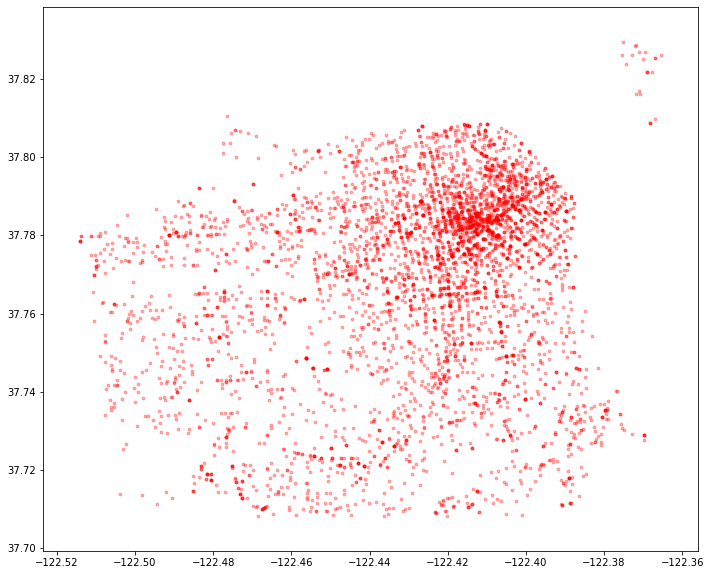

In [6]:
geo_SFO_EMS.plot(figsize=(13,10), marker="o", color="red", markersize=8, alpha=0.3)
plt.show()

In [7]:
#sf = geopandas.read_file('sf.geojson')
#sf.crs = {'init': 'epsg:4326'}
#sf = sf.rename(columns={'geometry': 'geometry','nhood':'neighborhood_name'}).set_geometry('geometry')
#sf.sample(5)

In [8]:
#sf = geo_SFO_EMS.groupby('Zipcode').count()
#sf_mod2 = pd.DataFrame(sf,columns=['Zipcode'])  # remove unneeded columns
#sf_mod2.reset_index(inplace=True)   # default index, otherwise groupby column becomes index
#sf_mod2.rename(columns={'Zipcode':'Zip Code','Category':'Count'}, inplace=True)
#sf_mod2.sort_values(by='Count', inplace=True, ascending=False)
#3print(sf_mod2)

In [9]:
#sf_mod = sf['Zip Code'], ['Count']]
#sf_mod.head()

In [10]:
#https://geodata.lib.berkeley.edu/catalog/ark28722-s7888q
sf = geopandas.read_file('san-francisco.geojson')
sf.crs = {'init': 'epsg:4326'}
sf = sf.rename(columns={'geometry': 'geometry','nhood':'neighborhood_name'}).set_geometry('geometry')
sf.sample(5)

,OBJECTID,DISTRICT,COMPANY,geometry
0,1,CENTRAL,A,"POLYGON ((-122.40532 37.80687, -122.40440 37.8..."
5,6,RICHMOND,G,"POLYGON ((-122.44805 37.78237, -122.44804 37.7..."
2,3,BAYVIEW,C,"POLYGON ((-122.39342 37.70841, -122.39349 37.7..."
3,4,MISSION,D,"POLYGON ((-122.40802 37.76940, -122.40767 37.7..."
6,7,INGLESIDE,H,"POLYGON ((-122.40830 37.70833, -122.41009 37.7..."


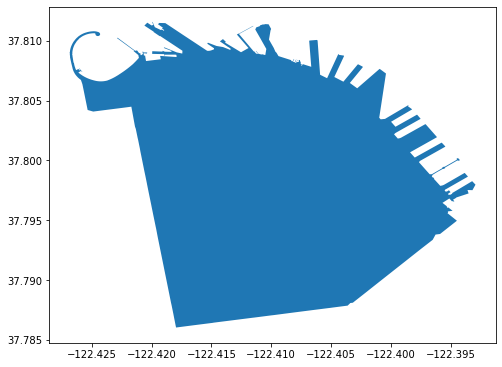

In [11]:
sf[0:1].plot(figsize=(8,8))
plt.show()

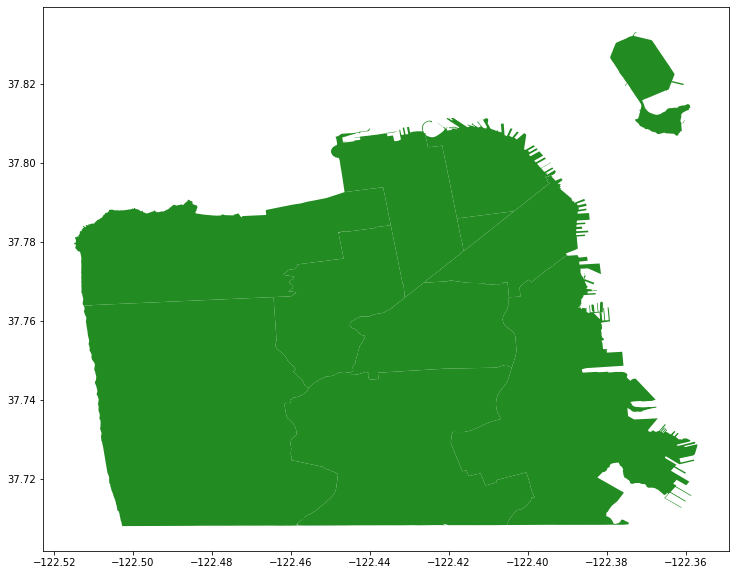

In [17]:
sf.plot(figsize=(13,10), color='forestgreen')
plt.show()

In [66]:
#conda install -c conda-forge folium

In [67]:
#import folium  
#from IPython.display import HTML, display
#LDN_COORDINATES = (37.77, -122.42) 
#myMap = folium.Map(location=LDN_COORDINATES, zoom_start=12)
#myMap._build_map()
#mapWidth, mapHeight = (400,500) # width and height of the displayed iFrame, in pixels
#srcdoc = myMap.HTML.replace('"', '&quot;')
#embed = HTML('<iframe srcdoc="{}" '
             #'style="width: {}px; height: {}px; display:block; width: 50%; margin: 0 auto; '
             #'border: none"></iframe>'.format(srcdoc, width, height))
#embed

In [68]:
import folium

#map_osm=folium.Map(location=[37.77, -122.42], zoom_start=6, tiles='Stamen Terrain')
#folium.Marker([37.77, -122.42]).add_to(map_osm)

#map_osm.save('spst.html')

In [69]:
sf_map = folium.Map(
       location=[-122.42, 37.77],
       zoom_start=12)

In [70]:
#pip install --user descartes

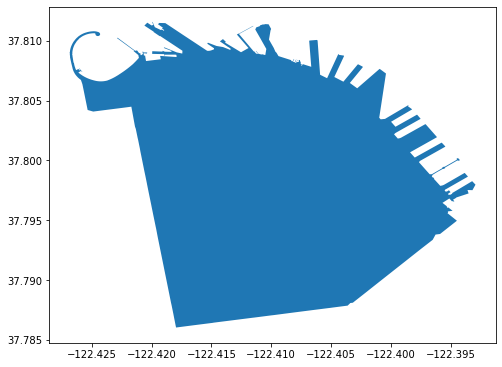

In [71]:
sf[0:1].plot(figsize=(8,8))
plt.show()

In [73]:
#conda install descartes

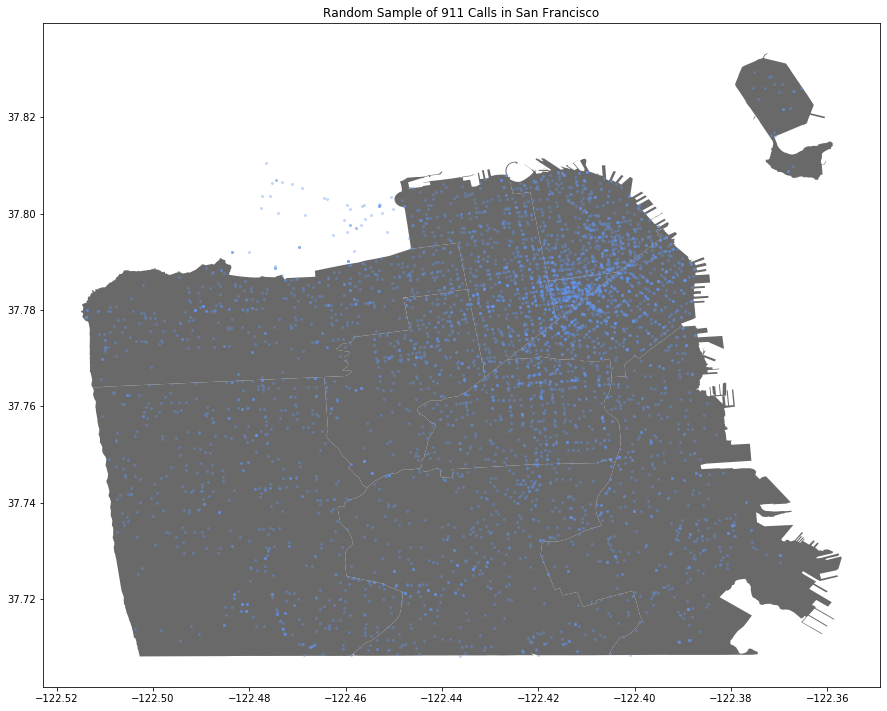

In [37]:
fig, ax = plt.subplots(1, figsize=(15,15))
sf_map = sf.plot(ax=ax, color='dimgrey')
geo_SFO_EMS.plot(ax=sf_map, marker="o", color="cornflowerblue", markersize=4, alpha=0.3)
#geo_SFO_EMS.plot(figsize=(13,10), marker="o", color="red", markersize=8, alpha=0.3)
#geo_SFO_EMS.plot(ax=sf_map, marker='o', color='red', markersize=8, alpha=0.3)
ax.set_title('Random Sample of 911 Calls in San Francisco')
plt.show()